# Telco Customer Churn — Data Exploration

In this notebook, we explore the Telco Churn dataset. We will:
- Inspect columns and data types
- Check for missing values
- Look at class balance (churn vs non-churn)
- Get a first impression of the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from raw folder
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

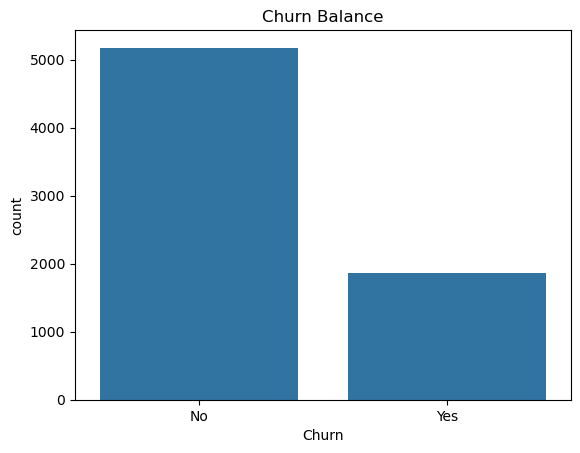

In [9]:
# Distribution of target variable (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Churn Balance')
plt.show()

In [11]:
# Separate numerical and categorical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", num_features)
print("Categorical features:", cat_features)


Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


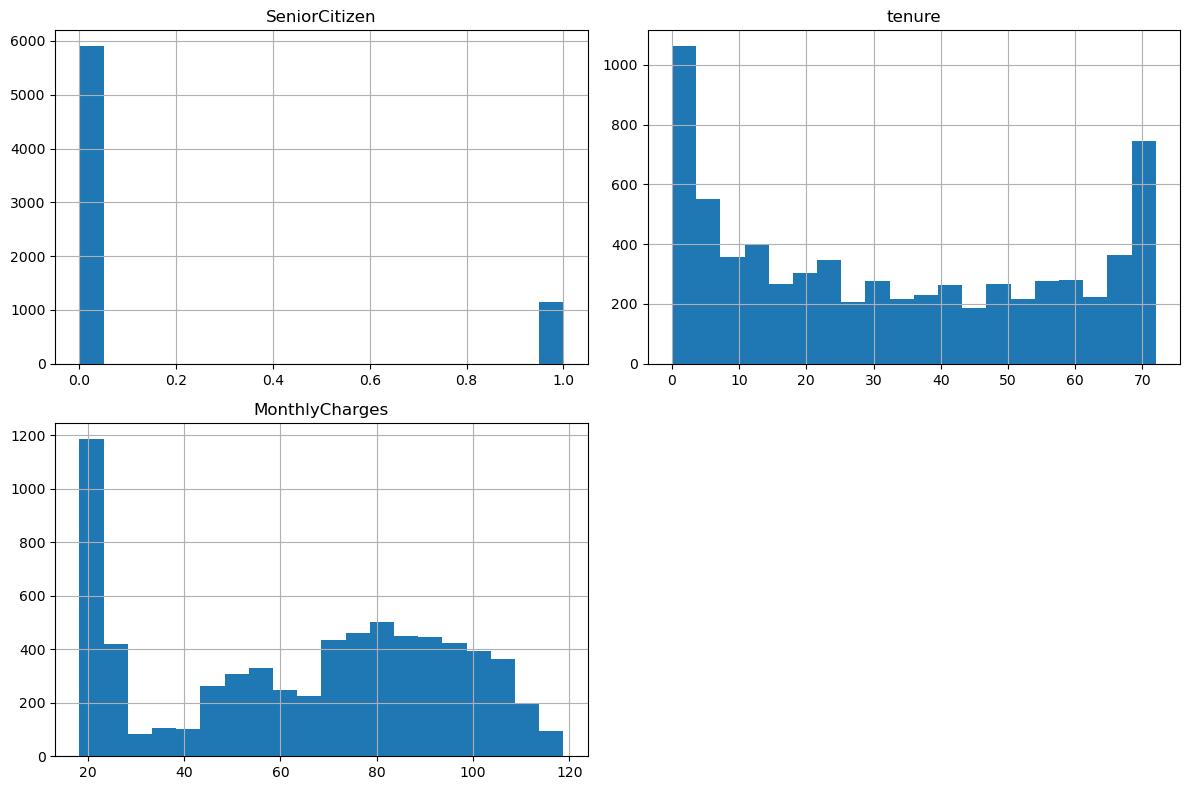

In [13]:
# Histograms for numerical features
df[num_features].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


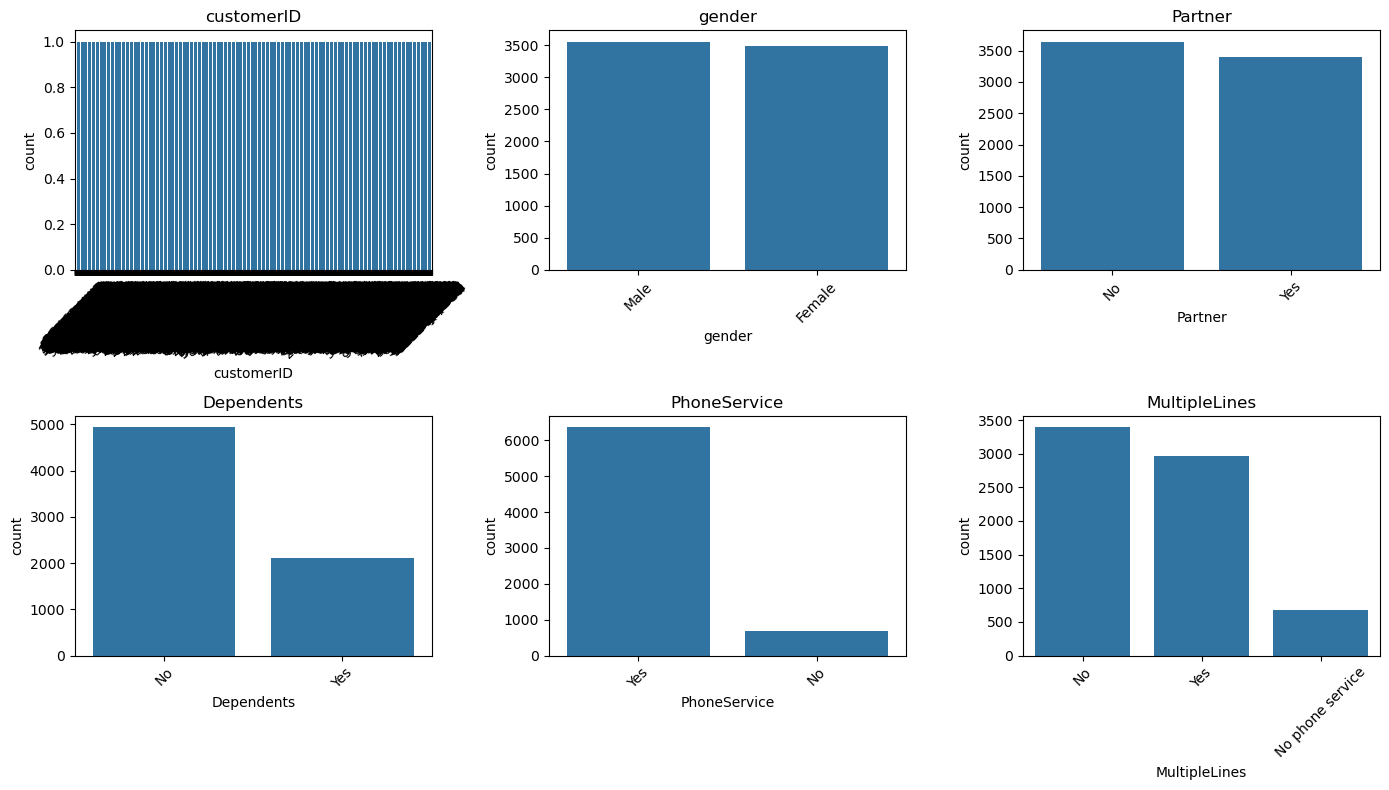

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# First batch of categorical features
batch1 = cat_features[:6]

plt.figure(figsize=(14, 8))
for i, col in enumerate(batch1, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


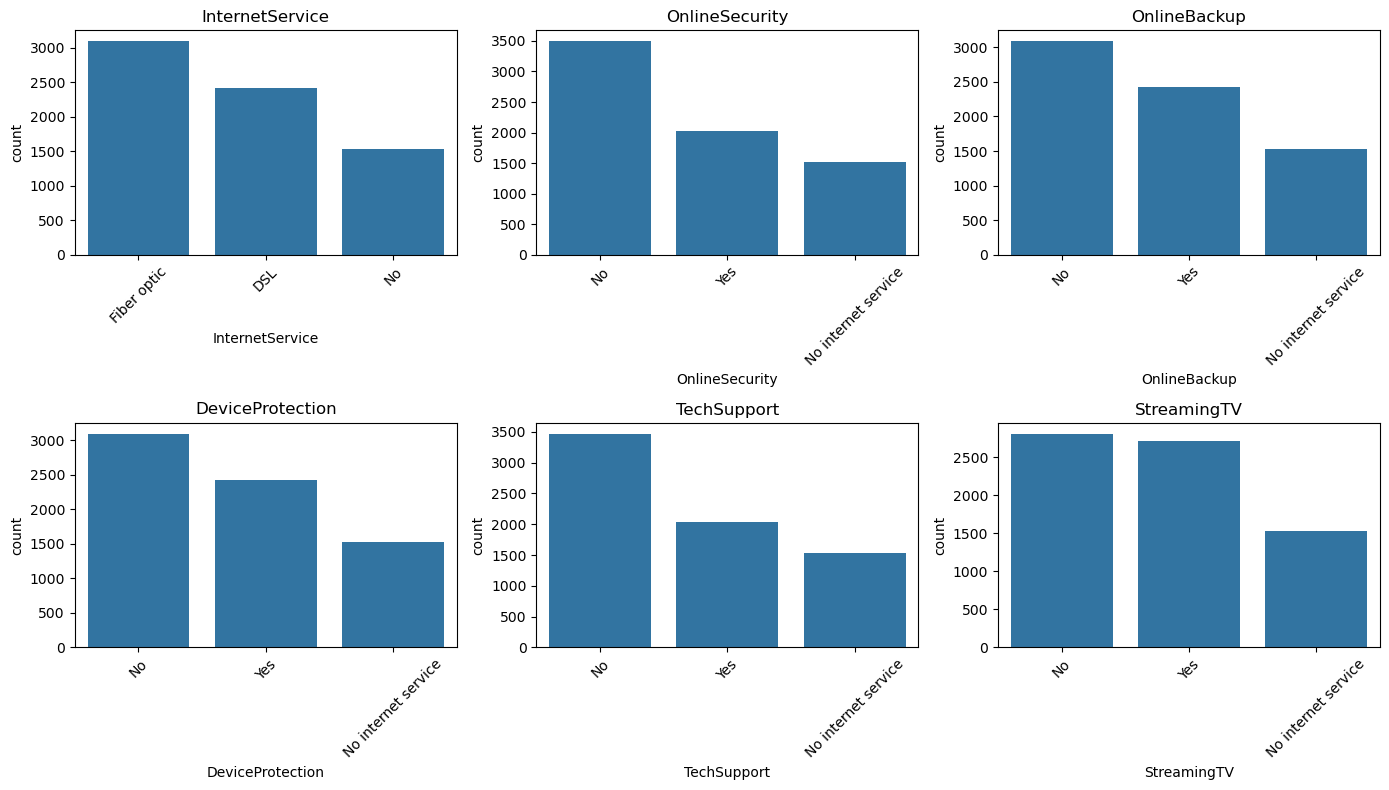

In [17]:
# Second batch of categorical features
batch2 = cat_features[6:12]

plt.figure(figsize=(14, 8))
for i, col in enumerate(batch2, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


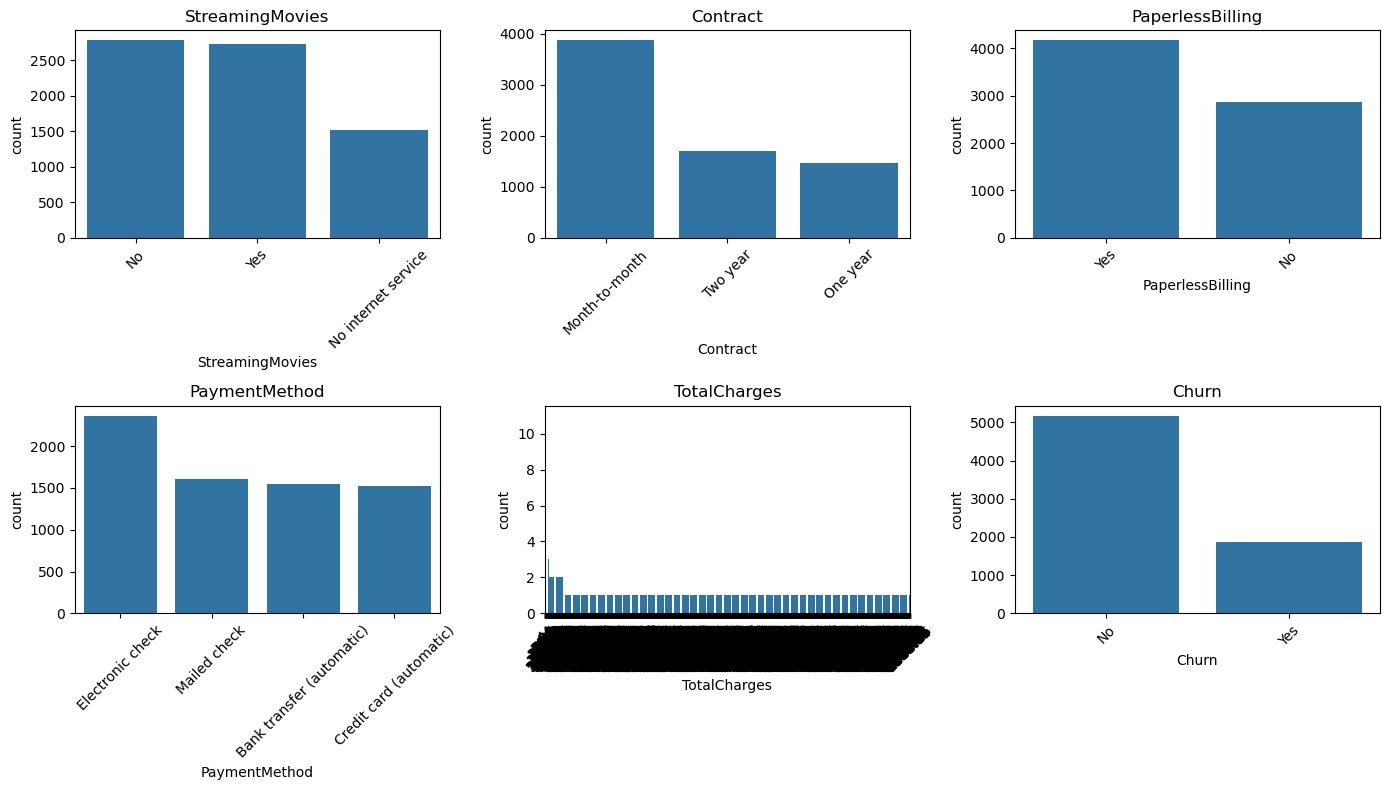

In [19]:
# Third batch of categorical features
batch3 = cat_features[12:]

plt.figure(figsize=(14, 8))
for i, col in enumerate(batch3, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\yosep\AppData\Local\Temp\ipykernel_21788\3152157782.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\yosep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


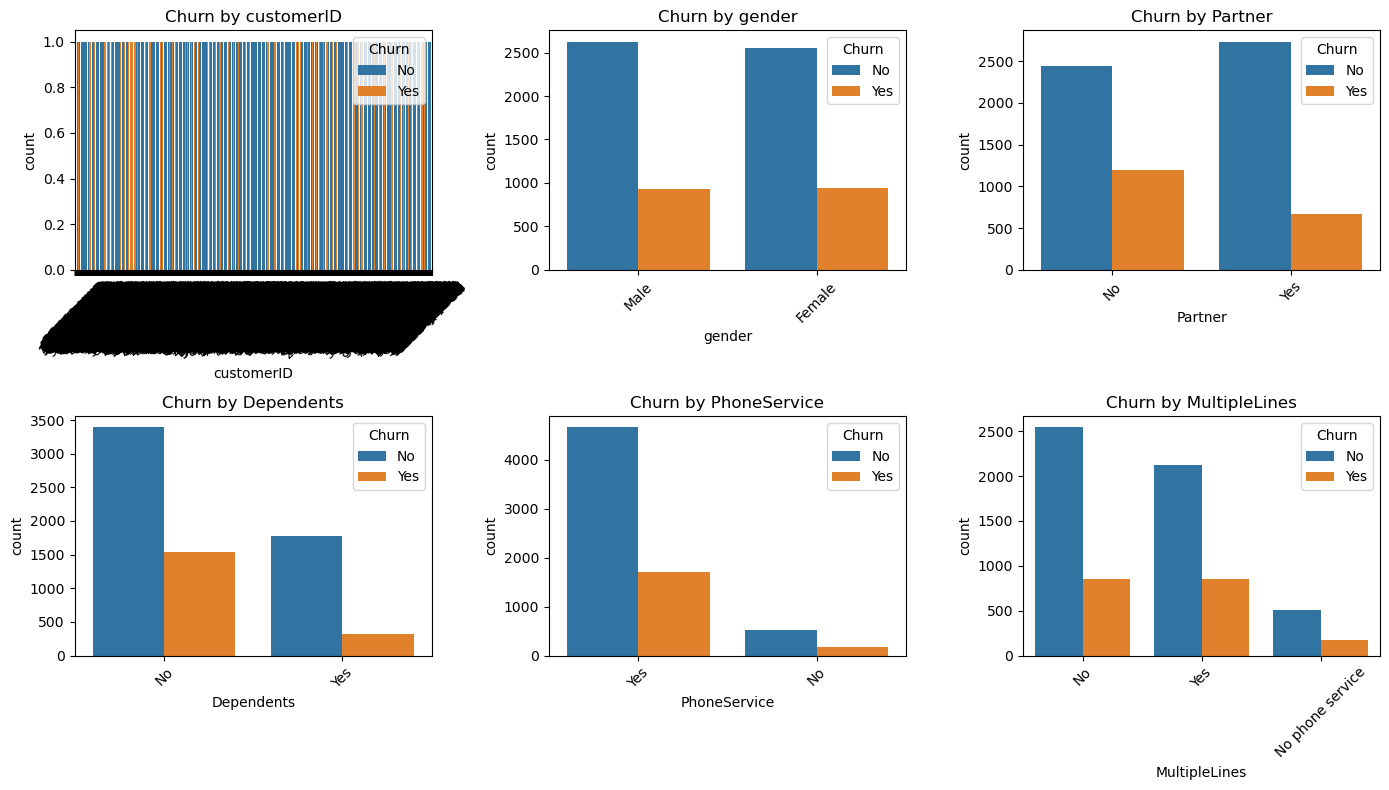

In [22]:
# First batch of churn vs categorical features
batch1 = cat_features[:6]

plt.figure(figsize=(14, 8))
for i, col in enumerate(batch1, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="Churn", data=df, order=df[col].value_counts().index)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


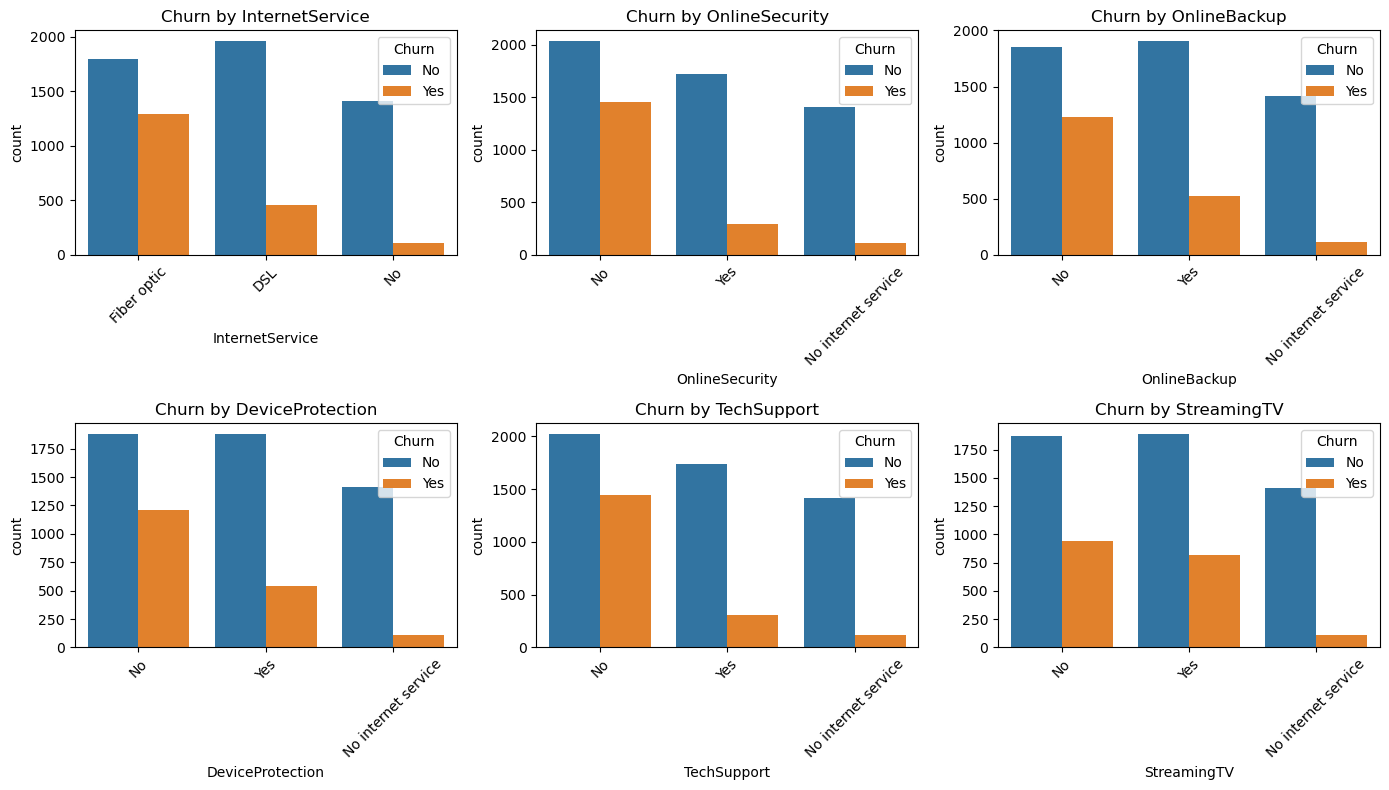

In [24]:
# Second batch of churn vs categorical features
batch2 = cat_features[6:12]

plt.figure(figsize=(14, 8))
for i, col in enumerate(batch2, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="Churn", data=df, order=df[col].value_counts().index)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


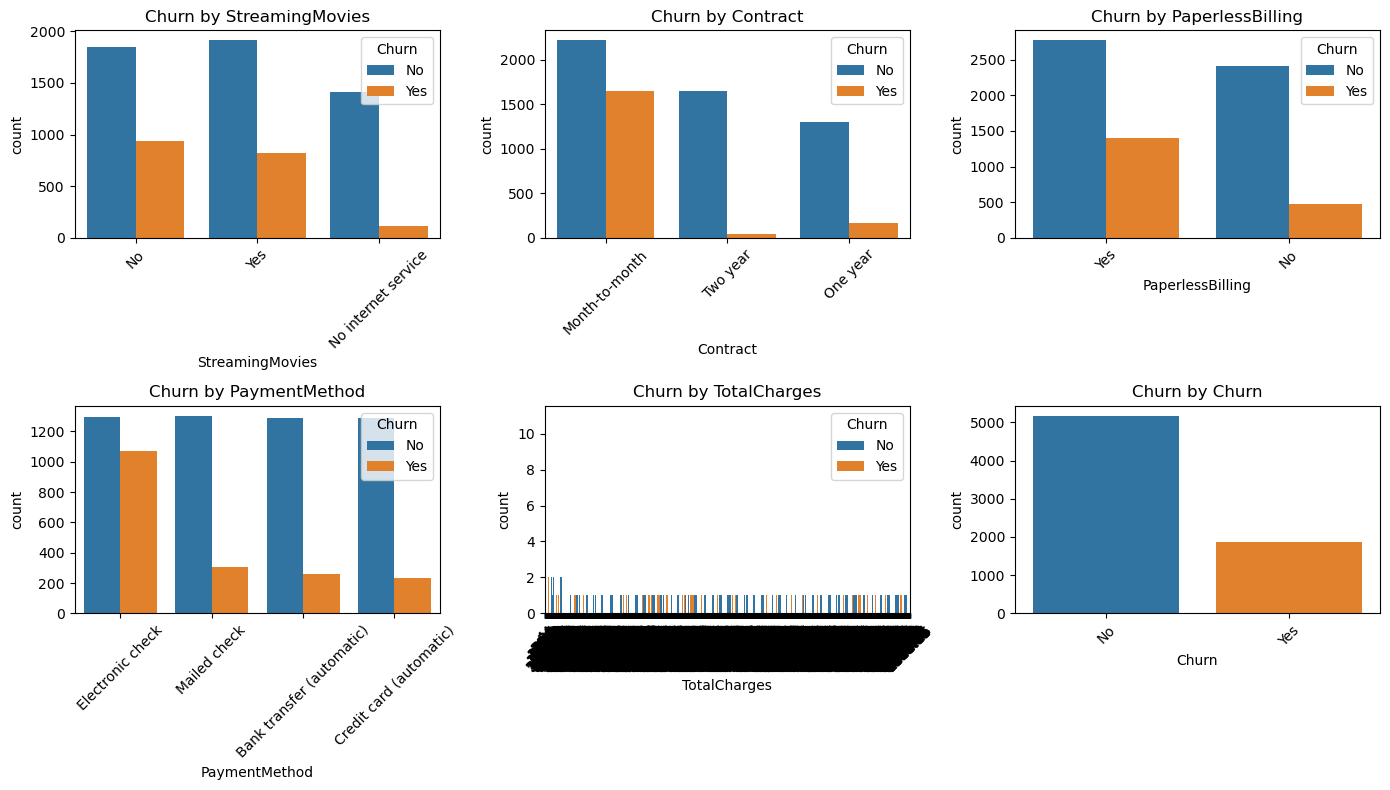

In [26]:
# Third batch of churn vs categorical features
batch3 = cat_features[12:]

plt.figure(figsize=(14, 8))
for i, col in enumerate(batch3, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="Churn", data=df, order=df[col].value_counts().index)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import pandas as pd

# 0) Make sure TotalCharges is numeric (coerce errors to NaN, then fill)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 1) Target first: map Yes/No -> 1/0
y = (df['Churn'] == 'Yes').astype(int)

# 2) Feature table without the target and without ID
X = df.drop(columns=['Churn', 'customerID'])

# 3) One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# 4) Train/test split (stratified to keep churn ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 5) Scale all features for Logistic Regression
scaler = StandardScaler(with_mean=False)  # with_mean=False is safer for sparse matrices
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 6) Train baseline Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 7) Evaluate
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.8417525640032034
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Reuse the encoded features X and target y built above
# (split again to have an unscaled copy for tree models)
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Random Forest with class-weight to address churn imbalance
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    n_jobs=-1,
    random_state=42,
    class_weight="balanced_subsample"
)

rf.fit(Xrf_train, yrf_train)

y_pred_rf = rf.predict(Xrf_test)
y_prob_rf = rf.predict_proba(Xrf_test)[:, 1]

print("RF ROC-AUC:", roc_auc_score(yrf_test, y_prob_rf))
print(classification_report(yrf_test, y_pred_rf))


RF ROC-AUC: 0.8284572063344442
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Split again (tree models don’t need scaling)
Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Compute class weight ratio (to balance churn vs non-churn)
pos = ygb_train.sum()
neg = len(ygb_train) - pos
scale_pos = neg / pos

# XGBoost classifier
xgb_clf = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
    scale_pos_weight=scale_pos
)

# Train without early stopping
xgb_clf.fit(Xgb_train, ygb_train)

# Predictions
y_pred_xgb = xgb_clf.predict(Xgb_test)
y_prob_xgb = xgb_clf.predict_proba(Xgb_test)[:, 1]

print("XGB ROC-AUC:", roc_auc_score(ygb_test, y_prob_xgb))
print(classification_report(ygb_test, y_pred_xgb))


XGB ROC-AUC: 0.832479526725051
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.77      1409



In [40]:
# SHAP explainability for the trained XGBoost model

import sys, subprocess, matplotlib.pyplot as plt
try:
    import shap
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "shap"])
    import shap

# Ensure the same Xgboost model and Xgb_test from earlier are in memory:
#   xgb_clf  -> trained XGBClassifier
#   Xgb_test -> test features (pandas DataFrame)

# Create SHAP values for the test set
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(Xgb_test)

# 1) Beeswarm (global feature impact distribution)
plt.figure()
shap.summary_plot(shap_values, Xgb_test, show=False)
plt.tight_layout()
plt.savefig("../reports/figures/shap_beeswarm.png", dpi=200, bbox_inches="tight")
plt.close()

# 2) Mean |SHAP| bar chart (global ranking)
plt.figure()
shap.summary_plot(shap_values, Xgb_test, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("../reports/figures/shap_bar.png", dpi=200, bbox_inches="tight")
plt.close()

print("Saved figures to: reports/figures/shap_beeswarm.png and shap_bar.png")


Saved figures to: reports/figures/shap_beeswarm.png and shap_bar.png


<Figure size 720x720 with 0 Axes>

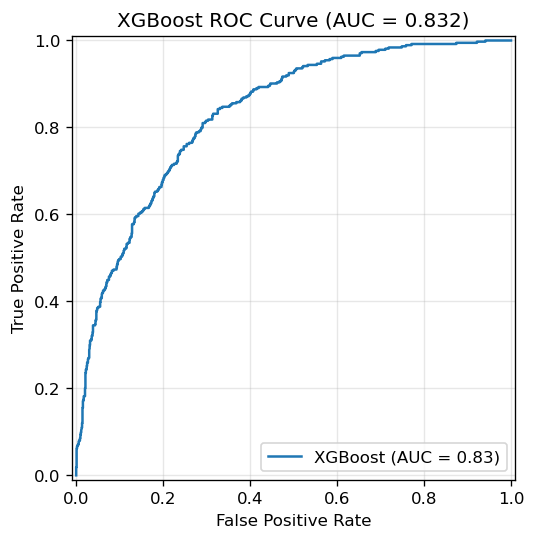

<Figure size 600x600 with 0 Axes>

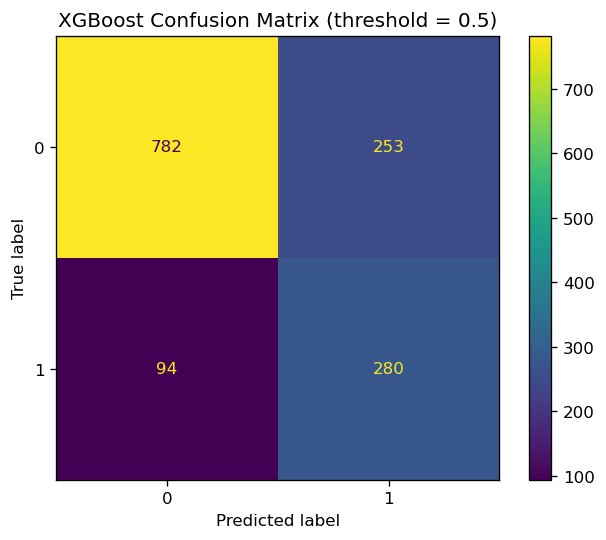

In [42]:
# =======================
# XGBoost: ROC + Confusion Matrix
# =======================

# --- change only if test set names differ ---
X_TEST = Xgb_test
Y_TEST = ygb_test
# --------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay

plt.rcParams["figure.dpi"] = 120

# Probabilities & predictions
y_true = np.array(Y_TEST)
y_prob = xgb_clf.predict_proba(X_TEST)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="XGBoost").plot()
plt.title(f"XGBoost ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True, alpha=0.3)
plt.show()

# Confusion Matrix
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.title("XGBoost Confusion Matrix (threshold = 0.5)")
plt.grid(False)
plt.show()


In [44]:
# =======================
# Save trained XGBoost model
# =======================
import joblib

joblib.dump(xgb_clf, "xgb_model.pkl")
print("Model saved as xgb_model.pkl")


Model saved as xgb_model.pkl


In [46]:
# Create a small CSV with the model's feature columns
# Assumes Xgb_test exists and matches the model's features

X_TEST = Xgb_test  # change only if the test set variable has a different name

import numpy as np
import pandas as pd

# Try to preserve feature names if the model has them
feature_cols = list(getattr(xgb_clf, "feature_names_in_", []))

if isinstance(X_TEST, pd.DataFrame):
    df = X_TEST.copy()
else:
    # Build a DataFrame either with known feature names or default numeric columns
    df = pd.DataFrame(X_TEST, columns=feature_cols if feature_cols else None)

out = df.iloc[:25].copy()  # keep it small for a quick test
out.to_csv("sample_input.csv", index=False)
print(f"Wrote sample_input.csv with shape {out.shape}")


Wrote sample_input.csv with shape (25, 30)


In [48]:
# Performance plots for XGBoost: ROC curve and Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# must exist from earlier:
# xgb_clf, Xgb_test, ygb_test, y_prob_xgb, y_pred_xgb

# 1) ROC curve
fpr, tpr, _ = roc_curve(ygb_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"XGB ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGBoost")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../reports/figures/roc_xgb.png", dpi=200, bbox_inches="tight")
plt.close()

# 2) Confusion Matrix (threshold = 0.5)
cm = confusion_matrix(ygb_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn (0)", "Churn (1)"])
fig, ax = plt.subplots()
disp.plot(ax=ax, values_format="d")
plt.title("Confusion Matrix — XGBoost (threshold=0.5)")
plt.tight_layout()
plt.savefig("../reports/figures/confusion_matrix_xgb.png", dpi=200, bbox_inches="tight")
plt.close()

print("Saved: reports/figures/roc_xgb.png and reports/figures/confusion_matrix_xgb.png")


Saved: reports/figures/roc_xgb.png and reports/figures/confusion_matrix_xgb.png
